In [149]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [150]:
import numpy as np
import pandas as pd

In [151]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [152]:
#Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [153]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [154]:
#reflect an existing database into a new model
Base = automap_base()

#reflect the tables
Base.prepare(engine, reflect=True)

In [155]:
#We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [156]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [157]:
#Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

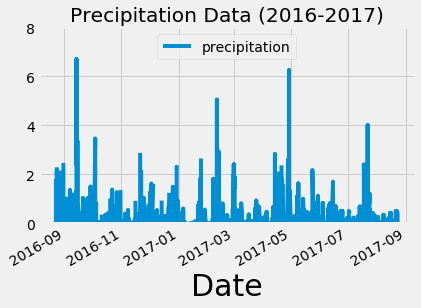

In [158]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date)
latest_yr = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_yr = latest_yr[0]
latest_yr

#Calculate the date 1 year ago from today
oneyear_ago = dt.datetime.strptime(latest_yr, "%Y-%m-%d")- dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
querydate=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyear_ago)

#Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(querydate, columns = ["date", "precipitation"])
precipitation_df["date"] = pd.to_datetime(precipitation_df["date"], format = "%Y-%m-%d")
precipitation_df.set_index("date", inplace = True)

#Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="date", ascending = True)
precipitation_df

#Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation Data (2016-2017)")
plt.legend(loc="upper center")
plt.ylim(0,8)
plt.savefig("Images/Precipitation.png", bbox_inches="tight")
plt.xlabel('Date', fontsize=30)
plt.show()

![precipitation](Images/precipitation.png)

In [159]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [160]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count() 
station_count

9

In [161]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [169]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowtemp_station = active_stations[0][0]
lowtemp_station

temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == lowtemp_station).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [170]:
# Choose the station with the highest number of temperature observations.
station_most_tempstats = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
station_most_tempstats = station_most_tempstats [0]
station_most_tempstats



'USC00519281'

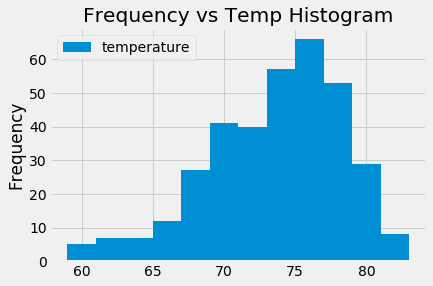

In [171]:
# Query the last 12 months of temperature observation data for this station and store as Dataframe
tempstats_12months = session.query(Measurement.tobs).filter(Measurement.date>=year_ago).filter(Measurement.station == station_most_tempstats).all()

temperature_observation = pd.DataFrame(tempstats_12months, columns=["temperature"])

temperature_observation.plot.hist(bins=12, title = "Frequency vs Temp Histogram")
plt.savefig("Images/frequency.png", bbox_inches="tight")
plt.show()

![precipitation](Images/station-histogram.png)

In [172]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-01-01', '2017-01-01'))

[(56.0, 74.1317494600432, 84.0)]


In [91]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [92]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [93]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [94]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [95]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
